In [2]:
using Serialization
using StatsPlots
using Statistics
using StatsBase
using DataFrames
using Printf
using LaTeXStrings
includet("../../lib/commondefs.jl")
pyplot()

Plots.PyPlotBackend()

In [3]:
dt = 0.03
kSlow = 0.05
kFast = 0.5
tracedat = deserialize("tracedata.jls")
df = DataFrame(sw = Float64[], tbps = Float64[], ibps = Float64[], mbps = Float64[])
for (sw, vals) in tracedat
    (tb, ib, mb, steps, trans) = vals
    push!(df, (sw, tb/steps, ib/steps, mb/steps))
end
statdat = deserialize("staticdata.jls")
static_bps = statdat[1] / statdat[2]
sort!(df);

In [4]:
(fastdat, slowdat) = deserialize("refdata.jls")
fast_bps = fastdat[1] / fastdat[2]
slow_bps = slowdat[1] / slowdat[2]
lowlim = slow_bps / 4

0.0013111894477711964

In [9]:
p1 = plot(xaxis=:log, legend=:right,
     xlabel=L"\log (\gamma/k_s)", ylabel=bitrate_label,
     xlim=(0.5e-3, 100), ylim=(static_bps - 0.001, 0.021), dpi=300)
plot!(p1, df.sw ./ kSlow, df.ibps, label=L"$\tilde{h}^{(1)}$",
      color=markov1_col,  markershape=markov1_shape, markersize=5.0,
      linewidth=0.5, linealpha=0.7, markerstrokewidth=0.5)
plot!(p1, df.sw ./ kSlow, df.mbps, label=L"$\tilde{h}^{(2)}$", 
        color=markov2_col, markershape=markov2_shape, 
        linewidth=0.5, linealpha=0.7, markerstrokewidth=0.5)
plot!(p1, df.sw ./ kSlow, df.tbps, label=L"$\tilde{h}^{\phantom{(2)}}$", 
      color=truedyn_col, markershape=truedyn_shape, 
      linewidth=0.5, linealpha=0.7, markerstrokewidth=0.5)
plot!(p1, df.sw ./ kSlow, [static_bps for _ in df.sw], label="Static Disorder", color=other1_col)

# Plot these two off of the main canvas so that we get them in a single legend
# for the inset
scatter!(p1, [0.0], [1.0],  markershape=:star, color=:magenta, markerstrokewidth=0.4, label=L"$\tilde{h} - \tilde{h}^{(1)}$ (inset)")
plot!(p1, [0.0], [1.0], label=L" \tilde{h}_{eff} -  \frac{\tilde{h}_f + \tilde{h}_s}{2}\text{ (inset)}", color=other2_col)

png("twotrack-model.png")

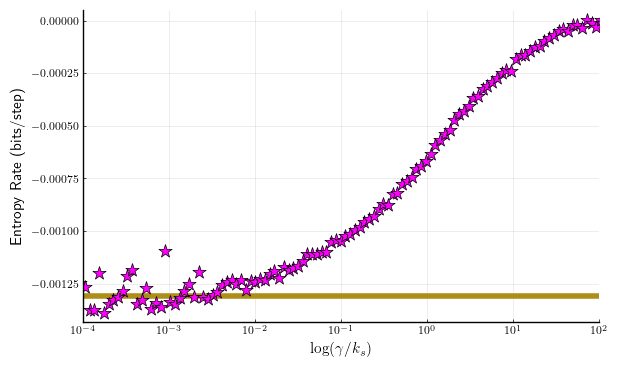

In [10]:
p2 = plot(xaxis=:log, legend_position=:topleft,
     xlabel=L"\log (\gamma / k_s)", ylabel=bitrate_label,
     xlim = (1e-4, 100),
     dpi=300, legend=false, size=(600, 350))
plot!(p2, df.sw ./ kSlow, [-lowlim for _ in df.sw], color=other2_col, linewidth=4,
     label=L" \tilde{h}_{eff} -  \frac{\tilde{h}_f + \tilde{h}_s}{2}")
scatter!(p2,  df.sw ./ kSlow, df.tbps - df.mbps, label=L"$\tilde{h} - \tilde{h}^{(1)}$", 
         markershape=:star, color=:magenta, markerstrokewidth=0.5, markersize=10)
png("twotrack-delta.png")

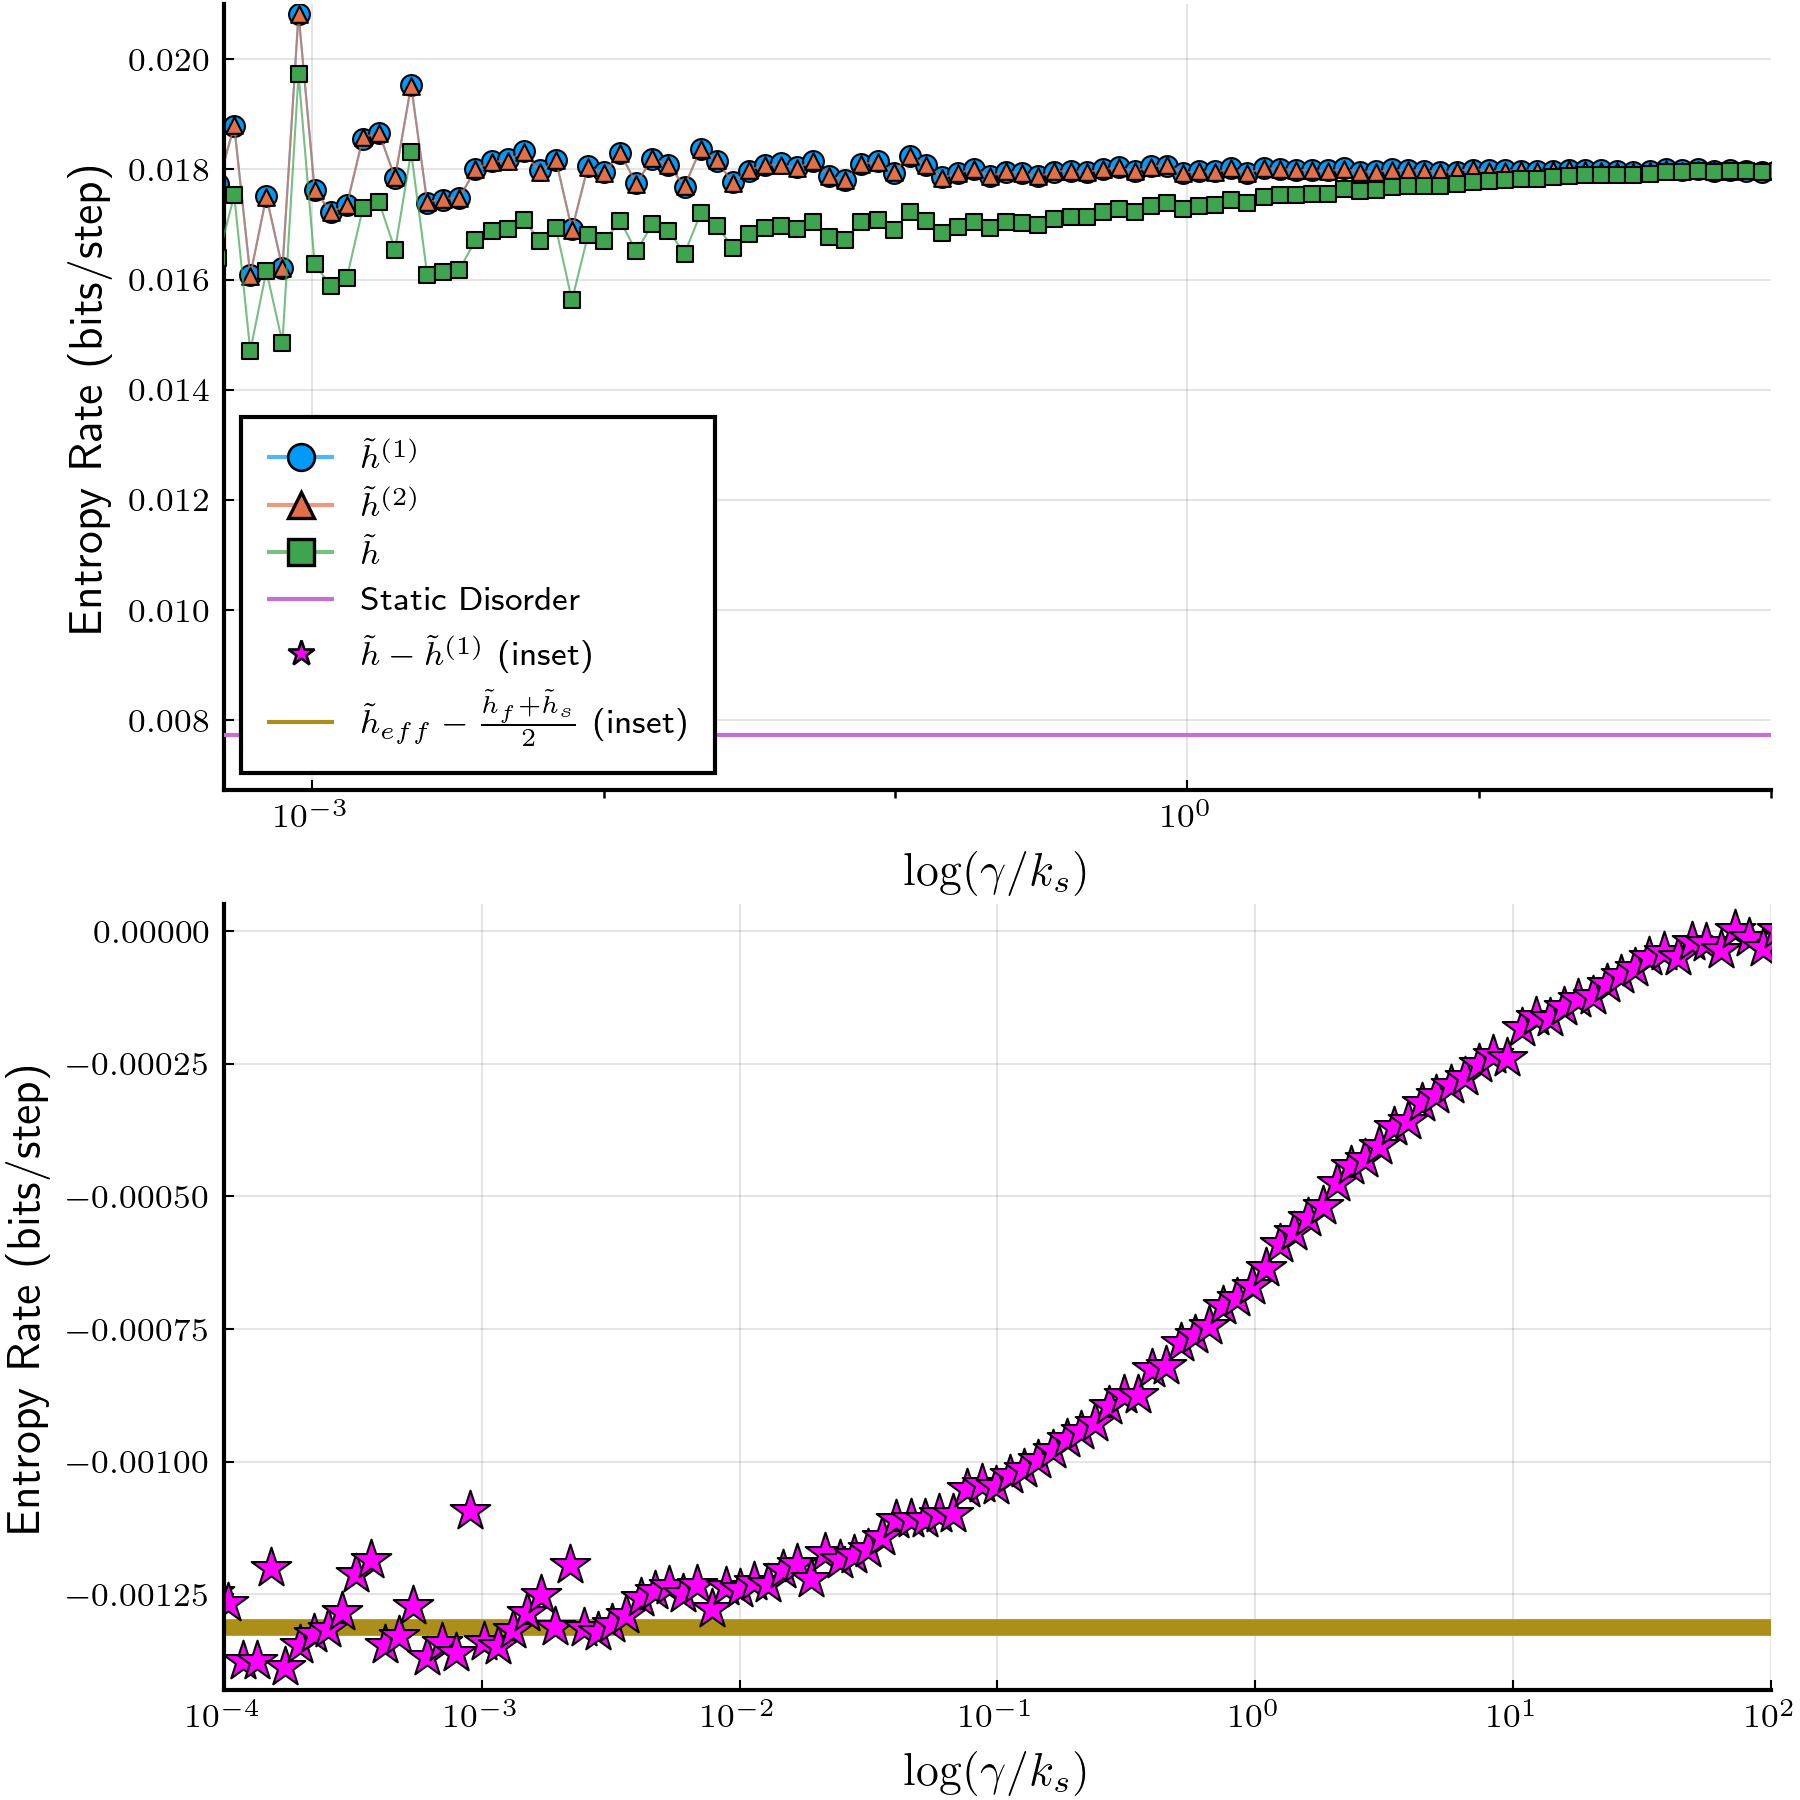

In [7]:
plot(p1, p2, layout=(2,1), size=(600,600))

In [8]:
png("twotrack-combined.png")